In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

In [2]:
corder = ['C1', 'C2', 'C3', 'C4', 'C0']

In [3]:
morder = ['MIN', 'OVERFLOW', 'MIXOTROPH', 'EXOENZYME', 'ROS',]
media_order = ['lowN', 'pro99']
mpalette = 'twilight'
sns.color_palette(mpalette, n_colors=5)

[(0.4828677867260272, 0.6304330455306234, 0.761915371498953),
 (0.3668108554010799, 0.26404857724525643, 0.6464799165290824),
 (0.18488035509396164, 0.07942573027972388, 0.21307651648984993),
 (0.5566322903496934, 0.17269677158182117, 0.31423043195101424),
 (0.775907907306857, 0.5355421788246119, 0.42413367909988375)]

In [4]:
gorder = [ 'Strong', 'Sustained', 'Weak', 'Inhibited','Axenic', 'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
sns.color_palette(gpalette)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.0, 0.0, 0.0),
 (0.8274509803921568, 0.8274509803921568, 0.8274509803921568)]

In [6]:
df_predicted_classes = pd.read_csv('monte_OVERFLOW_fix_predicted_classes.csv.gz')

In [7]:
df_predicted_classes.columns
# ['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model','hash']

Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
       'hash', 'VPRO', 'Unnamed: 0', 'Sample', 'full name', 'Group',
       'RMSE_Bptotal[N]', 'RMSE_Bptotal[C]', 'compare_points', 'RMSE',
       'RMSE_filled'],
      dtype='object')

In [8]:
dpath = '../results'
sim_df1 = pd.read_csv(os.path.join(dpath,'monte_fix_OVERFLOW_clean_mse.csv.gz',))
#sim_df2 = pd.read_csv(os.path.join(dpath,'monte2_het_mse.csv.gz',))
mse_df =     sim_df1

# mse_df = pd.concat([
#     sim_df1,
#     sim_df2,
# ])

In [9]:
mse_df.head()

,Unnamed: 0,Sample,full name,Group,RMSE_Bptotal[N],RMSE_Bptotal[C],compare_points,RMSE,run_id
0,0,10A0,Marinovum 5F3,Weak,9.907028,95.568846,74.0,946.803210,monte_OVERFLOW_fix_OVERFLOW_75_monte_vpro_2_22...
1,1,10B0,Marinovum 5F3,Weak,9.951968,96.228454,74.0,957.662492,monte_OVERFLOW_fix_OVERFLOW_75_monte_vpro_2_22...
2,2,10C0,Marinovum 5F3,Weak,7.794528,78.679107,74.0,613.266470,monte_OVERFLOW_fix_OVERFLOW_75_monte_vpro_2_22...
3,3,11A0,Roseovarius 5C3,Weak,7.886698,79.305029,74.0,625.454815,monte_OVERFLOW_fix_OVERFLOW_75_monte_vpro_2_22...
4,4,11B0,Roseovarius 5C3,Weak,9.231850,88.712599,74.0,818.981422,monte_OVERFLOW_fix_OVERFLOW_75_monte_vpro_2_22...


In [10]:
mse_df = mse_df.reset_index(drop=True)

In [11]:
min_mse_df = mse_df.loc[mse_df.groupby('run_id')['RMSE'].idxmin()]

In [12]:
del mse_df

In [13]:
min_mse_df.columns, df_predicted_classes.columns

(Index(['Unnamed: 0', 'Sample', 'full name', 'Group', 'RMSE_Bptotal[N]',
        'RMSE_Bptotal[C]', 'compare_points', 'RMSE', 'run_id'],
       dtype='object'),
 Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
        'hash', 'VPRO', 'Unnamed: 0', 'Sample', 'full name', 'Group',
        'RMSE_Bptotal[N]', 'RMSE_Bptotal[C]', 'compare_points', 'RMSE',
        'RMSE_filled'],
       dtype='object'))

In [14]:
df = pd.merge(df_predicted_classes, min_mse_df, on=['run_id'], how='left', suffixes=['', '_min'])

In [15]:
df.columns

Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
       'hash', 'VPRO', 'Unnamed: 0', 'Sample', 'full name', 'Group',
       'RMSE_Bptotal[N]', 'RMSE_Bptotal[C]', 'compare_points', 'RMSE',
       'RMSE_filled', 'Unnamed: 0_min', 'Sample_min', 'full name_min',
       'Group_min', 'RMSE_Bptotal[N]_min', 'RMSE_Bptotal[C]_min',
       'compare_points_min', 'RMSE_min'],
      dtype='object')

In [16]:
min_mse_df['run_id'].value_counts()

monte_OVERFLOW_fix_OVERFLOW_100_monte_vpro_2_100_31_OVERFLOW_82_lowN_all_OVERFLOW_h6878164821315599434    1
monte_OVERFLOW_fix_OVERFLOW_6_monte_vpro_2_58_32_OVERFLOW_29_lowN_all_OVERFLOW_h6878164821315599434       1
monte_OVERFLOW_fix_OVERFLOW_6_monte_vpro_2_52_23_OVERFLOW_43_lowN_all_OVERFLOW_h6878164821315599434       1
monte_OVERFLOW_fix_OVERFLOW_6_monte_vpro_2_52_23_OVERFLOW_60_lowN_all_OVERFLOW_h6878164821315599434       1
monte_OVERFLOW_fix_OVERFLOW_6_monte_vpro_2_52_23_OVERFLOW_77_lowN_all_OVERFLOW_h6878164821315599434       1
                                                                                                         ..
monte_OVERFLOW_fix_OVERFLOW_3_monte_vpro_2_38_60_OVERFLOW_27_lowN_all_OVERFLOW_h6878164821315599434       1
monte_OVERFLOW_fix_OVERFLOW_3_monte_vpro_2_38_60_OVERFLOW_63_lowN_all_OVERFLOW_h6878164821315599434       1
monte_OVERFLOW_fix_OVERFLOW_3_monte_vpro_2_45_88_OVERFLOW_3_lowN_all_OVERFLOW_h6878164821315599434        1
monte_OVERFLOW_fix_OVERFLOW_

In [17]:
#df_predicted_classes.shape, 
min_mse_df.shape, df.shape

((9835, 9), (9835, 26))

In [18]:
df.head()

,run_id,y_pred,max_prob,idx,media,which,model,hash,VPRO,Unnamed: 0,...,RMSE,RMSE_filled,Unnamed: 0_min,Sample_min,full name_min,Group_min,RMSE_Bptotal[N]_min,RMSE_Bptotal[C]_min,compare_points_min,RMSE_min
0,monte_OVERFLOW_fix_OVERFLOW_100_monte_vpro_2_1...,Weak,0.989954,monte_OVERFLOW_fix_OVERFLOW_100_monte_vpro_2_1...,lowN,all,OVERFLOW,h6878164821315599434,vpro_2_100_31_OVERFLOW,70865.0,...,69.279765,69.279765,70865,10C0,Marinovum 5F3,Weak,3.045764,22.746265,74.0,69.279765
1,monte_OVERFLOW_fix_OVERFLOW_100_monte_vpro_2_1...,Weak,0.990010,monte_OVERFLOW_fix_OVERFLOW_100_monte_vpro_2_1...,lowN,all,OVERFLOW,h6878164821315599434,vpro_2_100_31_OVERFLOW,55148.0,...,72.645929,72.645929,55148,10C0,Marinovum 5F3,Weak,3.055595,23.774721,74.0,72.645929
2,monte_OVERFLOW_fix_OVERFLOW_100_monte_vpro_2_1...,Axenic,0.800768,monte_OVERFLOW_fix_OVERFLOW_100_monte_vpro_2_1...,lowN,all,OVERFLOW,h6878164821315599434,vpro_2_100_5_OVERFLOW,299060.0,...,76.125190,76.125190,299060,1C0,Axenic,Axenic,4.030727,18.886218,74.0,76.125190
3,monte_OVERFLOW_fix_OVERFLOW_100_monte_vpro_2_1...,Weak,0.821818,monte_OVERFLOW_fix_OVERFLOW_100_monte_vpro_2_1...,lowN,all,OVERFLOW,h6878164821315599434,vpro_2_100_5_OVERFLOW,25781.0,...,302.456376,302.456376,25787,1C0,Axenic,Axenic,5.775247,25.666041,74.0,148.227718
4,monte_OVERFLOW_fix_OVERFLOW_100_monte_vpro_2_1...,Axenic,0.709254,monte_OVERFLOW_fix_OVERFLOW_100_monte_vpro_2_1...,lowN,all,OVERFLOW,h6878164821315599434,vpro_2_100_5_OVERFLOW,135650.0,...,82.333438,82.333438,135650,1C0,Axenic,Axenic,4.367854,18.849859,74.0,82.333438


In [19]:
df['RMSE'] = np.sqrt(df['RMSE'])

In [20]:
df.shape

(9835, 26)

In [21]:
df[['Group']].value_counts().reset_index()

,Group,0
0,Axenic,5370
1,Weak,3832
2,Sustained,238
3,Inhibited,31
4,Strong,5


In [22]:
df[['Group', 'Group_min']].value_counts() / 493.49

Group      Group_min
Axenic     Axenic       7.576648
Weak       Weak         6.419583
Axenic     Weak         1.728505
           Sustained    1.576526
Weak       Axenic       1.088168
Sustained  Axenic       0.409329
Weak       Sustained    0.249245
Inhibited  Weak         0.060792
Sustained  Sustained    0.042554
           Strong       0.026343
Strong     Axenic       0.010132
Weak       Inhibited    0.008106
Sustained  Weak         0.004053
Inhibited  Inhibited    0.002026
dtype: float64

In [23]:
12/49349

0.00024316602160124825

In [24]:
df[['Group','model']].value_counts().reset_index()

,Group,model,0
0,Axenic,OVERFLOW,5370
1,Weak,OVERFLOW,3832
2,Sustained,OVERFLOW,238
3,Inhibited,OVERFLOW,31
4,Strong,OVERFLOW,5


In [25]:
df['full name'].value_counts()

Axenic                            5370
Marinovum 5F3                     2243
Roseovarius 5C3                   1589
Sulfitobacter pseudonitzschiae     213
Marinobacter adhaerens HP15         29
Ruegeria pomeroyi                   25
Pseudoalteromonas haloplanktis       5
Phaeobacter gallaeciensis            2
Name: full name, dtype: int64

In [26]:
df['RMSE'].describe()

count    9476.000000
mean       14.823551
std         6.734125
min         1.304400
25%         9.063155
50%        13.353523
75%        19.331944
max        42.033700
Name: RMSE, dtype: float64

In [27]:
df.nlargest(10, 'RMSE')

,run_id,y_pred,max_prob,idx,media,which,model,hash,VPRO,Unnamed: 0,...,RMSE,RMSE_filled,Unnamed: 0_min,Sample_min,full name_min,Group_min,RMSE_Bptotal[N]_min,RMSE_Bptotal[C]_min,compare_points_min,RMSE_min
5535,monte_OVERFLOW_fix_OVERFLOW_60_monte_vpro_2_28...,Sustained,0.808256,monte_OVERFLOW_fix_OVERFLOW_60_monte_vpro_2_28...,lowN,all,OVERFLOW,h6878164821315599434,vpro_2_28_18_OVERFLOW,336762.0,...,42.033700,1766.831962,336732,1A0,Axenic,Axenic,11.185016,114.463648,74.0,1280.277694
5237,monte_OVERFLOW_fix_OVERFLOW_58_monte_vpro_2_28...,Sustained,0.838278,monte_OVERFLOW_fix_OVERFLOW_58_monte_vpro_2_28...,lowN,all,OVERFLOW,h6878164821315599434,vpro_2_28_18_OVERFLOW,330132.0,...,41.770290,1744.757102,330102,1A0,Axenic,Axenic,10.861682,111.144397,74.0,1207.215065
603,monte_OVERFLOW_fix_OVERFLOW_15_monte_vpro_2_22...,Strong,0.680032,monte_OVERFLOW_fix_OVERFLOW_15_monte_vpro_2_22...,lowN,all,OVERFLOW,h6878164821315599434,vpro_2_22_51_OVERFLOW,154455.0,...,41.538558,1725.451785,154446,1A0,Axenic,Axenic,11.688956,131.798508,74.0,1540.586982
7157,monte_OVERFLOW_fix_OVERFLOW_75_monte_vpro_2_68...,Sustained,0.694895,monte_OVERFLOW_fix_OVERFLOW_75_monte_vpro_2_68...,lowN,all,OVERFLOW,h6878164821315599434,vpro_2_68_32_OVERFLOW,250026.0,...,40.855146,1669.142951,249996,1A0,Axenic,Axenic,10.532890,113.859557,74.0,1199.270152
9261,monte_OVERFLOW_fix_OVERFLOW_95_monte_vpro_2_22...,Sustained,0.696727,monte_OVERFLOW_fix_OVERFLOW_95_monte_vpro_2_22...,lowN,all,OVERFLOW,h6878164821315599434,vpro_2_22_51_OVERFLOW,218436.0,...,40.577018,1646.494361,218406,1A0,Axenic,Axenic,9.404224,109.239651,74.0,1027.314192
9466,monte_OVERFLOW_fix_OVERFLOW_97_monte_vpro_2_28...,Sustained,0.917970,monte_OVERFLOW_fix_OVERFLOW_97_monte_vpro_2_28...,lowN,all,OVERFLOW,h6878164821315599434,vpro_2_28_18_OVERFLOW,334773.0,...,40.523281,1642.136328,334743,1A0,Axenic,Axenic,10.396105,106.075880,74.0,1102.775936
3865,monte_OVERFLOW_fix_OVERFLOW_45_monte_vpro_2_32...,Sustained,0.506352,monte_OVERFLOW_fix_OVERFLOW_45_monte_vpro_2_32...,lowN,all,OVERFLOW,h6878164821315599434,vpro_2_32_57_OVERFLOW,284385.0,...,40.360410,1628.962708,284355,1A0,Axenic,Axenic,9.741020,103.389775,74.0,1007.121896
4150,monte_OVERFLOW_fix_OVERFLOW_48_monte_vpro_2_28...,Sustained,0.961520,monte_OVERFLOW_fix_OVERFLOW_48_monte_vpro_2_28...,lowN,all,OVERFLOW,h6878164821315599434,vpro_2_28_18_OVERFLOW,218748.0,...,39.296418,1544.208457,218718,1A0,Axenic,Axenic,9.895483,100.502718,74.0,994.522914
2111,monte_OVERFLOW_fix_OVERFLOW_29_monte_vpro_2_44...,Sustained,0.759087,monte_OVERFLOW_fix_OVERFLOW_29_monte_vpro_2_44...,lowN,all,OVERFLOW,h6878164821315599434,vpro_2_44_85_OVERFLOW,25737.0,...,39.294179,1544.032465,25707,1A0,Axenic,Axenic,9.509153,99.485044,74.0,946.018479
8880,monte_OVERFLOW_fix_OVERFLOW_91_monte_vpro_2_32...,Strong,0.560384,monte_OVERFLOW_fix_OVERFLOW_91_monte_vpro_2_32...,lowN,all,OVERFLOW,h6878164821315599434,vpro_2_32_57_OVERFLOW,77820.0,...,39.281078,1543.003102,77811,1A0,Axenic,Axenic,11.021909,115.349818,74.0,1271.375224


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Axenic'),
  Text(0, 1.5, 'Inhibited'),
  Text(0, 2.5, 'Strong'),
  Text(0, 3.5, 'Sustained'),
  Text(0, 4.5, 'Weak')])

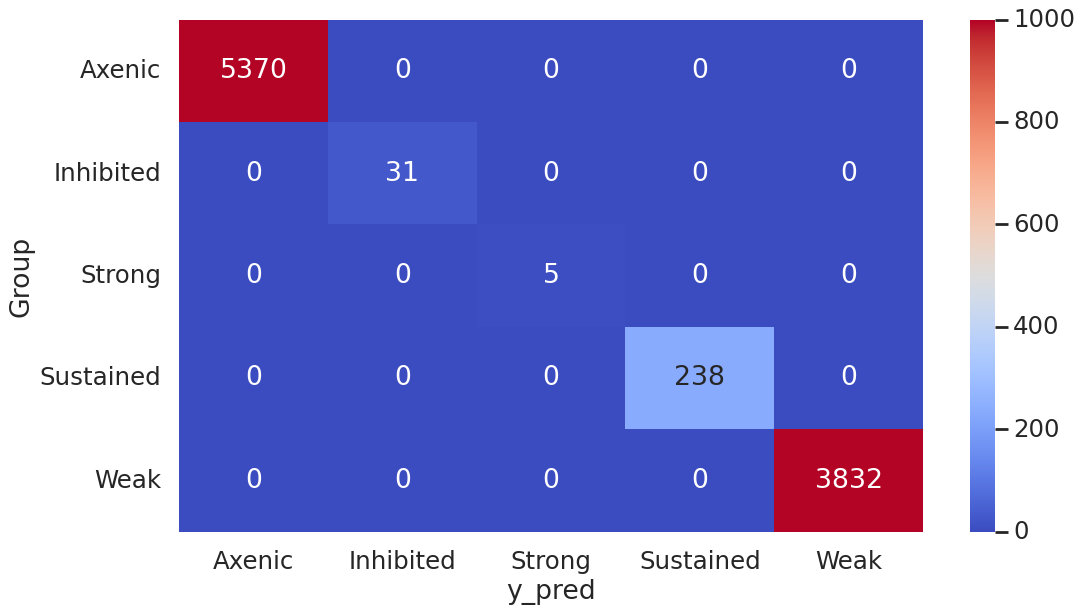

In [28]:
sns.heatmap(
    df[['Group', 'y_pred']].value_counts().reset_index().pivot(index='Group', columns='y_pred').fillna(0).droplevel(0, axis=1),
    cmap='coolwarm', 
    annot=True, fmt='.0f', vmax=1000
)
plt.yticks(rotation=0) 

In [29]:
df[['Group', 'y_pred']].value_counts().reset_index().pivot(index='Group', columns='y_pred').droplevel(0, axis=1).columns


Index(['Axenic', 'Inhibited', 'Strong', 'Sustained', 'Weak'], dtype='object', name='y_pred')

In [30]:
df['RMSE_clip'] = df.RMSE.clip(upper=100)

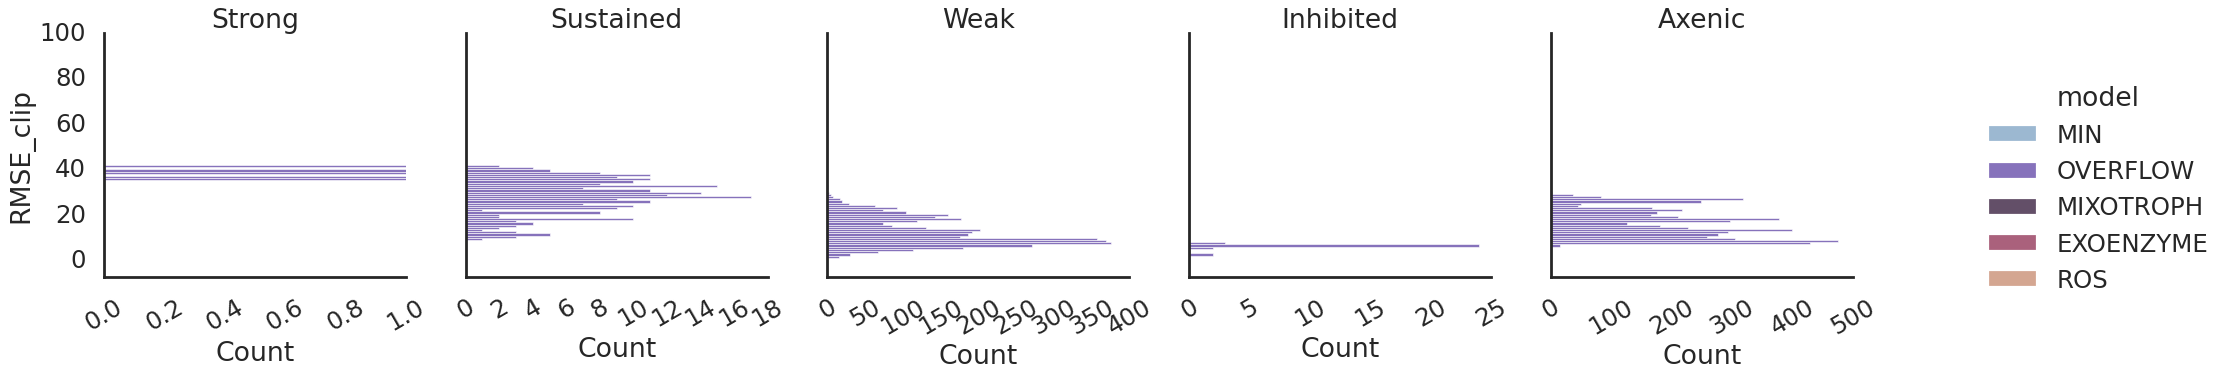

In [31]:
g = sns.displot(
    data=df,
    #col='y_pred', 
    col='Group', col_order=gorder[:-1],
    y='RMSE_clip',
    facet_kws=dict(sharex=False,margin_titles=True),
    #row='model',
    palette=mpalette, hue='model', hue_order=morder, multiple='stack',

)
g.set_titles(col_template='{col_name}', row_template='{row_name}')
g.set_xticklabels(rotation=30)
g.set(ylim=(-7,100))
#g.set(yscale='log')

In [32]:
df.pivot_table(index='model', columns='Group', values='run_id', aggfunc='count', fill_value=0).reindex(index=morder, columns=gorder[:-1])

Group,Strong,Sustained,Weak,Inhibited,Axenic
model,,,,,
MIN,NaN,NaN,NaN,NaN,NaN
OVERFLOW,5.0,238.0,3832.0,31.0,5370.0
MIXOTROPH,NaN,NaN,NaN,NaN,NaN
EXOENZYME,NaN,NaN,NaN,NaN,NaN
ROS,NaN,NaN,NaN,NaN,NaN


In [33]:
pdf = df.pivot_table(index='model', columns='y_pred', values='run_id', aggfunc='count', fill_value=0).reindex(index=morder, columns=gorder)
pdf

y_pred,Strong,Sustained,Weak,Inhibited,Axenic,Other
model,,,,,,
MIN,NaN,NaN,NaN,NaN,NaN,NaN
OVERFLOW,5.0,238.0,3832.0,31.0,5370.0,359.0
MIXOTROPH,NaN,NaN,NaN,NaN,NaN,NaN
EXOENZYME,NaN,NaN,NaN,NaN,NaN,NaN
ROS,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
pdf.div(pdf.sum(axis=1), axis=0) *100

y_pred,Strong,Sustained,Weak,Inhibited,Axenic,Other
model,,,,,,
MIN,NaN,NaN,NaN,NaN,NaN,NaN
OVERFLOW,0.050839,2.419929,38.962888,0.315201,54.600915,3.650229
MIXOTROPH,NaN,NaN,NaN,NaN,NaN,NaN
EXOENZYME,NaN,NaN,NaN,NaN,NaN,NaN
ROS,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.groupby(['model', 'VPRO']).y_pred.unique().str.join(',').reset_index().groupby(['model','y_pred']).size()

model     y_pred                            
OVERFLOW  Axenic                                 1
          Axenic,Inhibited,Weak                  1
          Axenic,Other,Sustained,Strong,Weak     1
          Axenic,Other,Weak                      3
          Axenic,Other,Weak,Sustained            1
          Axenic,Sustained,Other,Weak            3
          Axenic,Sustained,Other,Weak,Strong     1
          Axenic,Sustained,Weak,Other            1
          Axenic,Weak                           10
          Axenic,Weak,Other                      3
          Axenic,Weak,Other,Sustained            3
          Axenic,Weak,Sustained                  1
          Axenic,Weak,Sustained,Other            2
          Weak                                   4
          Weak,Axenic                            5
          Weak,Axenic,Other                      1
          Weak,Axenic,Other,Sustained            2
          Weak,Axenic,Sustained                  4
          Weak,Axenic,Sustained,Other

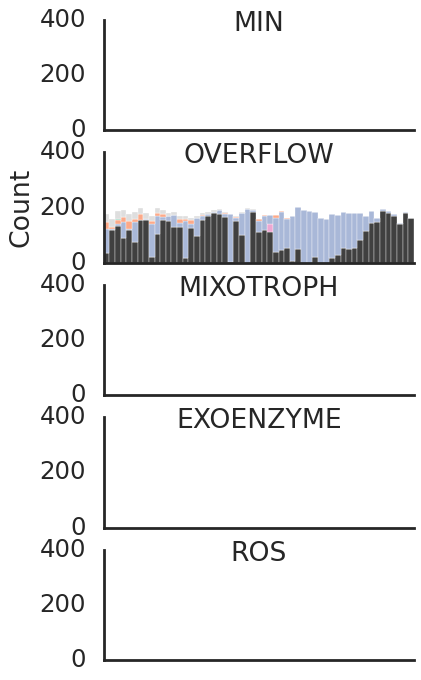

In [37]:
fig, axs = plt.subplots(5, sharey=True, figsize=(5,10))
for i,m in enumerate(morder):
        t = df.loc[
            df.model.isin([m]) #& df.VPRO_cluster.isin([c])
            #df.Group.isin(glist)
        ].copy()
        if t.shape[0]>0:
            tnumdf = t.pivot_table(
                index='VPRO', columns='y_pred', values='model', aggfunc='count', fill_value=0
            ).reindex(columns=[ 'Axenic','Weak',  'Sustained','Strong',   'Inhibited','Other', ])
            #tnumdf['total'] = tnumdf.sum(axis=1)        
            tnumdf = tnumdf.sort_values(by=list(reversed(tnumdf.columns.to_list())))
            t['VPRO_'] = pd.Categorical(t['VPRO'], reversed(tnumdf.index))
            g = sns.histplot(
                data=t, lw=0.3,
                hue='y_pred', x='VPRO_',  discrete=True, multiple='stack',
                hue_order=[gorder[-1]] + gorder[:-1], palette=[gpalette[-1]] + gpalette[:-1],
                ax=axs[i], 
                #aspect=1,
                legend=False,
                       )
        axs[i].set_xticks([])
        axs[i].set_yticks([0,200,400])
        axs[i].set_xlabel('')
        axs[i].set_title(m, y=0.85)
        sns.despine()
            #g.set(xticklabels=[])
            #g.set_titles(col_template='{col_name}', row_template='{row_name}')
            #axs[i,j].set_title(f'{m} {c}')
plt.show()


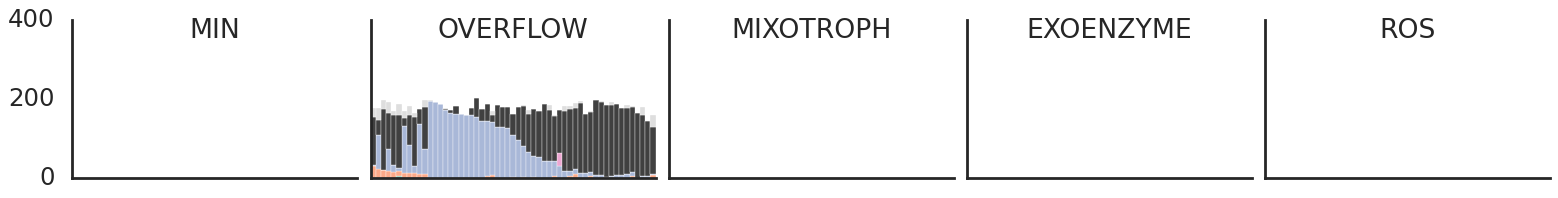

In [38]:
fig, axs = plt.subplots(1,5, sharey=True, figsize=(20,3))
for i,m in enumerate(morder):
        t = df.loc[
            df.model.isin([m]) #& df.VPRO_cluster.isin([c])
            #df.Group.isin(glist)
        ].copy()
        if t.shape[0]>0:
            tnumdf = t.pivot_table(
                index='VPRO', columns='y_pred', values='model', aggfunc='count', fill_value=0
            )
            tnumdf = tnumdf.clip(lower=10)
            tnumdf = tnumdf.reindex(columns=gorder)
            tnumdf = tnumdf.sort_values(by=list(tnumdf.columns.to_list()), ascending=False)
            t['VPRO_'] = pd.Categorical(t['VPRO'], tnumdf.index)
            g = sns.histplot(
                data=t, lw=0.3,
                hue='y_pred', x='VPRO_',  discrete=True, multiple='stack',
                #hue_order=[gorder[-1]] + gorder[:-1], palette=[gpalette[-1]] + gpalette[:-1],
                hue_order=reversed(gorder), palette=reversed(gpalette),
                ax=axs[i], 
                #aspect=1,
                legend=False,
                       )
        axs[i].set_xticks([])
        axs[i].set_yticks([0,200,400])
        axs[i].set_xlabel('')
        axs[i].set_title(m, y=0.85)
            #g.set(xticklabels=[])
            #g.set_titles(col_template='{col_name}', row_template='{row_name}')
            #axs[i,j].set_title(f'{m} {c}')
        sns.despine()
fig.tight_layout(w_pad=0.5) # Or equivalently,  "plt.tight_layout()"            
plt.show()


In [39]:
tnumdf

y_pred,Strong,Sustained,Weak,Inhibited,Axenic,Other
VPRO,,,,,,
vpro_2_22_11_OVERFLOW,10,30,10,10,120,24
vpro_2_28_18_OVERFLOW,10,22,87,10,37,32
vpro_2_68_32_OVERFLOW,10,19,10,10,154,22
vpro_2_44_85_OVERFLOW,10,17,57,10,91,27
vpro_2_83_63_OVERFLOW,10,15,17,10,128,10
vpro_2_32_57_OVERFLOW,10,14,10,10,132,28
vpro_2_79_60_OVERFLOW,10,13,119,10,20,18
vpro_2_97_16_OVERFLOW,10,13,71,10,75,24
vpro_2_22_50_OVERFLOW,10,13,17,10,125,10


In [40]:
for i,m in enumerate(morder):
    t = df.loc[
        df.model.isin([m]) 
    ].copy()
    if t.shape[0]>0:
        tnumdf = t.pivot_table(
            index='VPRO', columns='y_pred', values='model', aggfunc='count', fill_value=0
        ).reindex(columns=gorder)
        #tnumdf['total'] = tnumdf.sum(axis=1)        
        tnumdf = tnumdf.sort_values(by=list(reversed(tnumdf.columns.to_list())))
        t['VPRO_'] = pd.Categorical(t['VPRO'], reversed(tnumdf.index))


In [41]:
tnumdf

y_pred,Strong,Sustained,Weak,Inhibited,Axenic,Other
VPRO,,,,,,
vpro_2_66_72_OVERFLOW,0,0,159,0,0,0
vpro_2_23_78_OVERFLOW,0,0,162,0,0,0
vpro_2_100_31_OVERFLOW,0,0,187,0,0,0
vpro_2_45_88_OVERFLOW,0,0,193,0,0,0
vpro_2_65_37_OVERFLOW,0,1,164,0,6,0
vpro_2_88_4_OVERFLOW,0,0,158,0,19,0
vpro_2_13_26_OVERFLOW,0,0,162,0,21,0
vpro_2_66_64_OVERFLOW,0,0,145,0,29,0
vpro_2_46_77_OVERFLOW,0,11,125,0,38,0


In [47]:
df.loc[df.Group.isin(['Strong','Sustained', 'Inhibited'])].VPRO.value_counts().nlargest(30)

vpro_2_13_19_OVERFLOW    31
vpro_2_22_11_OVERFLOW    30
vpro_2_28_18_OVERFLOW    22
vpro_2_68_32_OVERFLOW    19
vpro_2_32_57_OVERFLOW    18
vpro_2_44_85_OVERFLOW    17
vpro_2_83_63_OVERFLOW    15
vpro_2_97_16_OVERFLOW    13
vpro_2_79_60_OVERFLOW    13
vpro_2_22_50_OVERFLOW    13
vpro_2_46_77_OVERFLOW    11
vpro_2_80_73_OVERFLOW    11
vpro_2_58_32_OVERFLOW    10
vpro_2_47_15_OVERFLOW     8
vpro_2_22_51_OVERFLOW     7
vpro_2_83_45_OVERFLOW     6
vpro_2_83_53_OVERFLOW     5
vpro_2_65_24_OVERFLOW     5
vpro_2_10_14_OVERFLOW     4
vpro_2_23_61_OVERFLOW     4
vpro_2_31_17_OVERFLOW     3
vpro_2_52_23_OVERFLOW     3
vpro_2_18_79_OVERFLOW     2
vpro_2_36_37_OVERFLOW     1
vpro_2_35_55_OVERFLOW     1
vpro_2_91_13_OVERFLOW     1
vpro_2_65_37_OVERFLOW     1
Name: VPRO, dtype: int64

In [48]:
# get a list of high growth VPROs
VPRO_lst = df.loc[df.y_pred.isin(['Strong','Sustained', 'Inhibited'
                                 # 'Other'
                                 ]),['model','VPRO']].value_counts().reset_index()

VPRO_lst = VPRO_lst.rename(columns={0: 'count'})
#VPRO_lst = VPRO_lst.loc[VPRO_lst['count'].ge(5)]
#VPRO_lst['VPRO'].to_csv('../VPRO/high_growing_vpro.csv', index=False)
VPRO_lst.model.value_counts()
VPRO_lst

,model,VPRO,count
0,OVERFLOW,vpro_2_13_19_OVERFLOW,31
1,OVERFLOW,vpro_2_22_11_OVERFLOW,30
2,OVERFLOW,vpro_2_28_18_OVERFLOW,22
3,OVERFLOW,vpro_2_68_32_OVERFLOW,19
4,OVERFLOW,vpro_2_32_57_OVERFLOW,18
5,OVERFLOW,vpro_2_44_85_OVERFLOW,17
6,OVERFLOW,vpro_2_83_63_OVERFLOW,15
7,OVERFLOW,vpro_2_97_16_OVERFLOW,13
8,OVERFLOW,vpro_2_22_50_OVERFLOW,13
9,OVERFLOW,vpro_2_79_60_OVERFLOW,13


In [49]:
for m in ['OVERFLOW']:
    VPRO_lst.loc[VPRO_lst.model.isin([m]),'VPRO'].to_csv(f'../VPRO/high_growing_vpro_{m}.csv', index=False, header=False)
    

In [50]:
df = df.drop(columns=['Unnamed: 0'])

In [51]:
df.columns

Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
       'hash', 'VPRO', 'Sample', 'full name', 'Group', 'RMSE_Bptotal[N]',
       'RMSE_Bptotal[C]', 'compare_points', 'RMSE', 'RMSE_filled',
       'Unnamed: 0_min', 'Sample_min', 'full name_min', 'Group_min',
       'RMSE_Bptotal[N]_min', 'RMSE_Bptotal[C]_min', 'compare_points_min',
       'RMSE_min', 'RMSE_clip'],
      dtype='object')